## EDA OF Netflix Data

In [65]:
#import libraries

%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


In [66]:
#import data
path = "/Users/erandi/Documents/Learning/IBM-Machine Learning- Coursera/Python-code/Netflix-movie-recommendation/netflix_titles.csv"

In [67]:
data = pd.read_csv(path)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [68]:
no_rows = data.shape[0]
no_columns = data.shape[1]
column_names = data.columns.tolist()
print("no of rows: "+str(no_rows))
print("no of columns: "+str(no_columns))
print(column_names)

#Data types
print(data.dtypes)


no of rows: 8807
no of columns: 12
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [69]:
data.release_year.value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1961       1
1925       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [70]:
min_year = min(data.release_year)
max_year = max(data.release_year)
print(min_year)
print(max_year)

1925
2021


In [71]:
data.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

## About Dataset
The dataset contains 8807 rows and 12 columns. Each row represents a single Netflix show with column headers 'show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'. This includes TV shows and movies released between 1925-2021 under different rating categories; namely PG-13, TV-MA, PG, TV-14, TV-PG,TV-Y, TV-Y7, R, TV-G, G, NC-17, NR,TV-Y7-FV, and UR. 74 min' '84 min' '66 min'


## Cleaning the Dataset

### Check for Missing Values

In [72]:
print('The number of  Missing Values are: ')
data.isnull().sum().sum()

The number of  Missing Values are: 


4307

### Check for Duplicates

print('The number of rows with duplicate movies: ')
data.title.duplicated().sum()

In [74]:
len(data.title.unique())

8807

In [75]:
#Drop duplicates Title
#data = data.drop_duplicates(subset=["title"])


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8803 non-null object
duration        8804 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


After a quick analysis of the data, we can see there are no duplicates but there are missing values in some columns. There are a total of 4307 null values across the entire dataset. Namely, 'director', 'cast', 'country', 'date_added', 'rating' and 'duration' columns are missing some values as follows.

### Treating Missing Values

In [78]:
print('\nColumns with missing value:') 
print(data.isnull().any())


Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


In [79]:
data.T.apply(lambda x: x.isnull().sum(), axis = 1)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [80]:
data.director.fillna("Unavailable", inplace=True)
data.cast.fillna("Unavailable", inplace=True)
data.country.fillna("Unavailable", inplace=True)
data.dropna(subset=["date_added", "rating","duration"], inplace=True)


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8790 non-null object
type            8790 non-null object
title           8790 non-null object
director        8790 non-null object
cast            8790 non-null object
country         8790 non-null object
date_added      8790 non-null object
release_year    8790 non-null int64
rating          8790 non-null object
duration        8790 non-null object
listed_in       8790 non-null object
description     8790 non-null object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [82]:
print('\nColumns with missing value:') 
print(data.isnull().any())


Columns with missing value:
show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool


In [83]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unavailable,Unavailable,Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



Even though deleting rows with missing values is the easiest way to handle the missing data, it wouldn’t be beneficial in our case since it is a loss of information.
Therefore, the null values in “director,” “cast,” and “country” columns were replaced with “unavailable” since these columns contain the majority of null values, The other 
three attributes, “date_added”, “rating” and “duration” contain an insignificant portion of the data, so the rows with missing values under in these columns were dropped from the dataset. This resulted a data set with 8790 rows without any missing values.


### Data Transformation

In [85]:
#Extract year from date of date_added column
data['date_added'] = data['date_added'].apply(lambda x: 
                                    str.split(x)[-1])

data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unavailable,2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unavailable,Unavailable,Unavailable,2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Visulaization

### 1. Netflix show by content

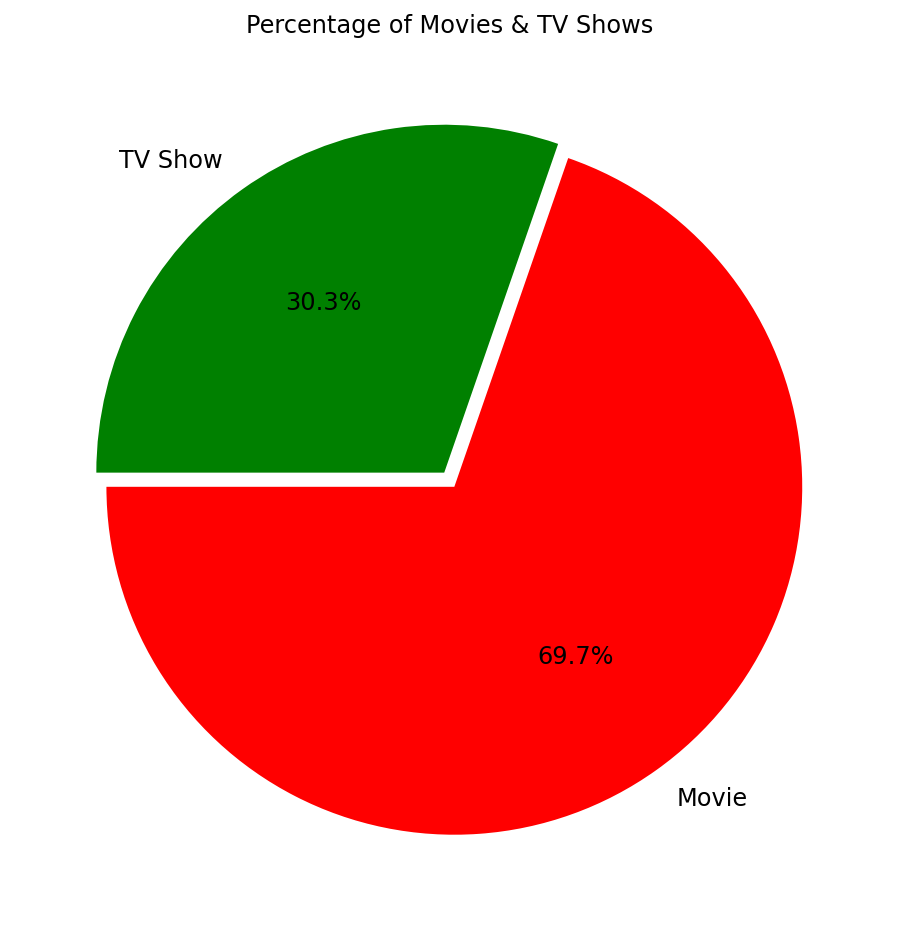

In [88]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.figure(figsize=(8,8))

g = plt.pie(data.type.value_counts(),explode=(0.025,0.025), labels=data.type.value_counts().index, colors=['red','green'],autopct='%1.1f%%', startangle=180)
plt.title("Percentage of Movies & TV Shows")

plt.savefig("Showtypes.png", dpi=300)
plt.show()



This Netflix dataset consists of both movies and TV shows. This simple pie chart shows in a glance that Netflix uploaded more movies(69.7%)  than TV-shows (30.3%) between 2008 and 2021.


### 2. Top Genres on Netflix

<Figure size 2160x1080 with 0 Axes>

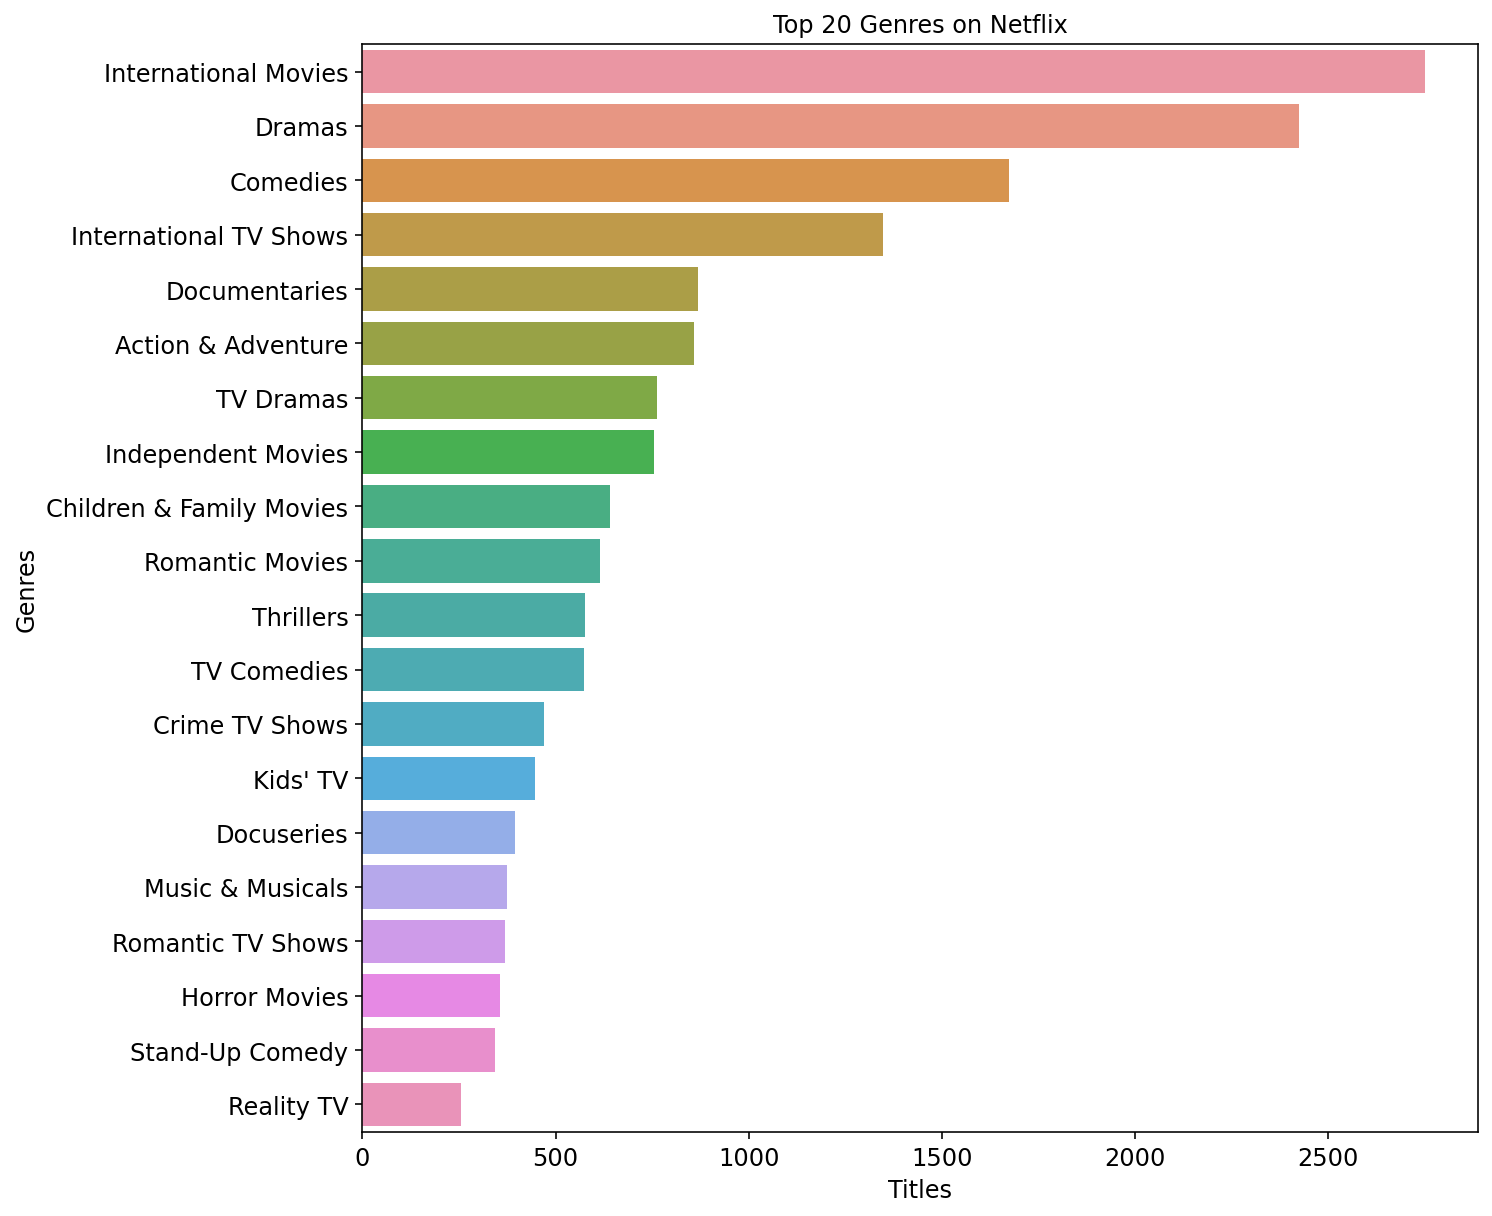

In [89]:
#2. Top Genres on Netflix


plt.figure(figsize=(30,15))
filtered_genres = data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')

plt.savefig("Genres.png", bbox_inches='tight',dpi=300)
plt.show()

According to above bar plot, International Movies take the first place, followed by dramas and comedies.

### 3.  Rating Distribution

<Figure size 864x864 with 0 Axes>

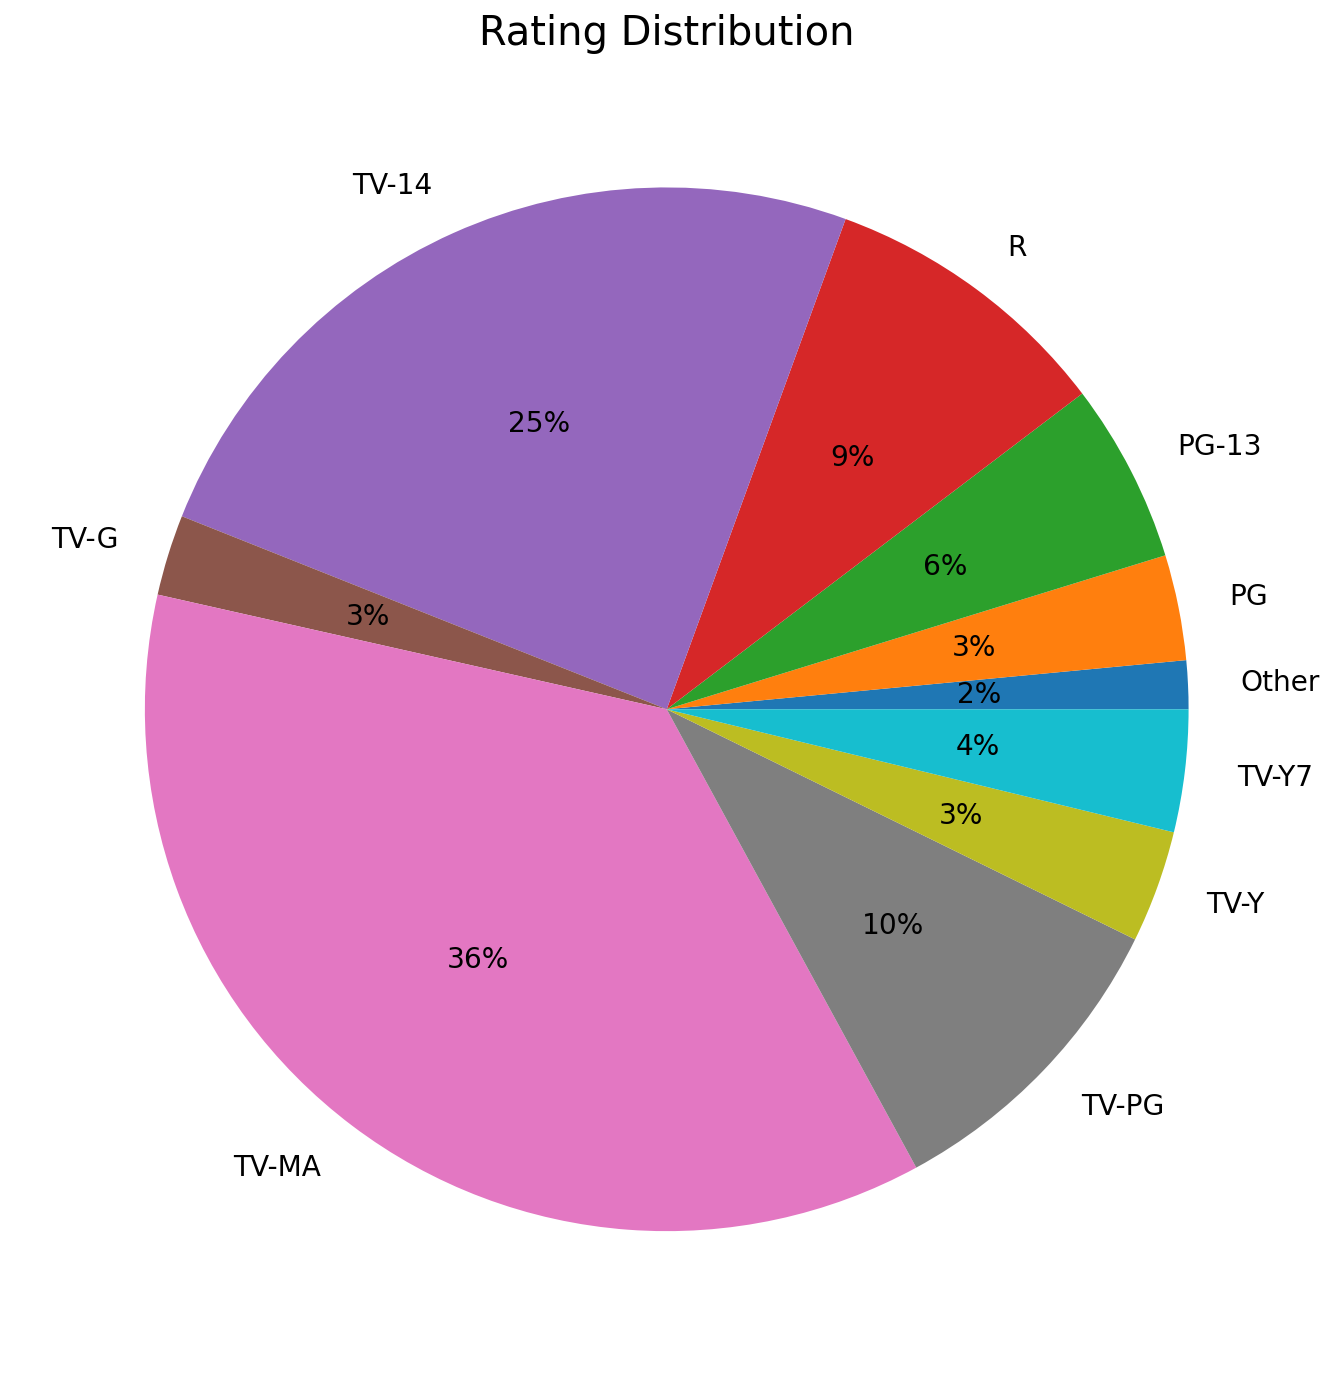

In [123]:
rating_count = pd.read_csv("/Users/erandi/Documents/Learning/IBM-Machine Learning- Coursera/Python-code/Netflix-movie-recommendation/TV_rating_value count.csv")
plt.figure(figsize=(12,12))
rating_count.groupby(['rating']).sum().plot(kind='pie', y ='count', autopct='%1.0f%%',  figsize = (12,12), legend = None, fontsize =14)
pylab.ylabel('')
pylab.title("Rating Distribution", fontsize=20)
plt.savefig("Rating-distribution.png", bbox_inches='tight',dpi=300)
plt.show()

The majority (36.5%) of Netflix content belongs to “TV-MA” rating category. TV-MA represents Mature Audience Only content which are unsuitable for children under 17. This is followed by TV-14 (24.5%), TV-PG (9.8%), R (9.1%) and PG-13 (5.6%) ratings. This data tells that greater number of Netflix shows are only suitable for adults.

### 4.  Which years had the most shows?

The Year-wise distribution of Netflix shows


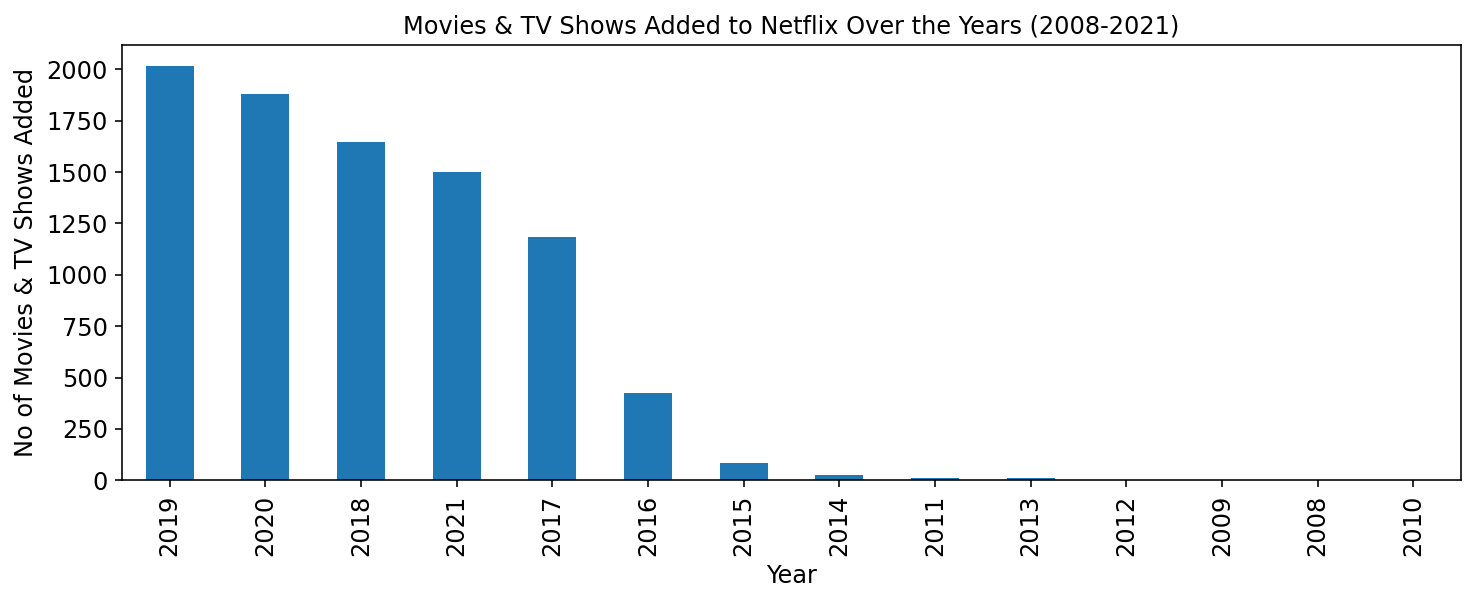

In [41]:
print("The Year-wise distribution of Netflix shows")
year_no_of_shows=data["date_added"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,4))
year_no_of_shows.plot(title='Movies & TV Shows Added to Netflix Over the Years (2008-2021)',kind="bar")

plt.xlabel("Year")
plt.ylabel("No of Movies & TV Shows Added")
plt.savefig("Total_shows_vs_year.png", bbox_inches='tight',dpi=300)
plt.show()

As shown in the above bar chart content added to Netflix started to increase exponentially since 2016. Among these recent years, largest number of new content added to Netflix during 2019. 

### 5. Content by Country of Production

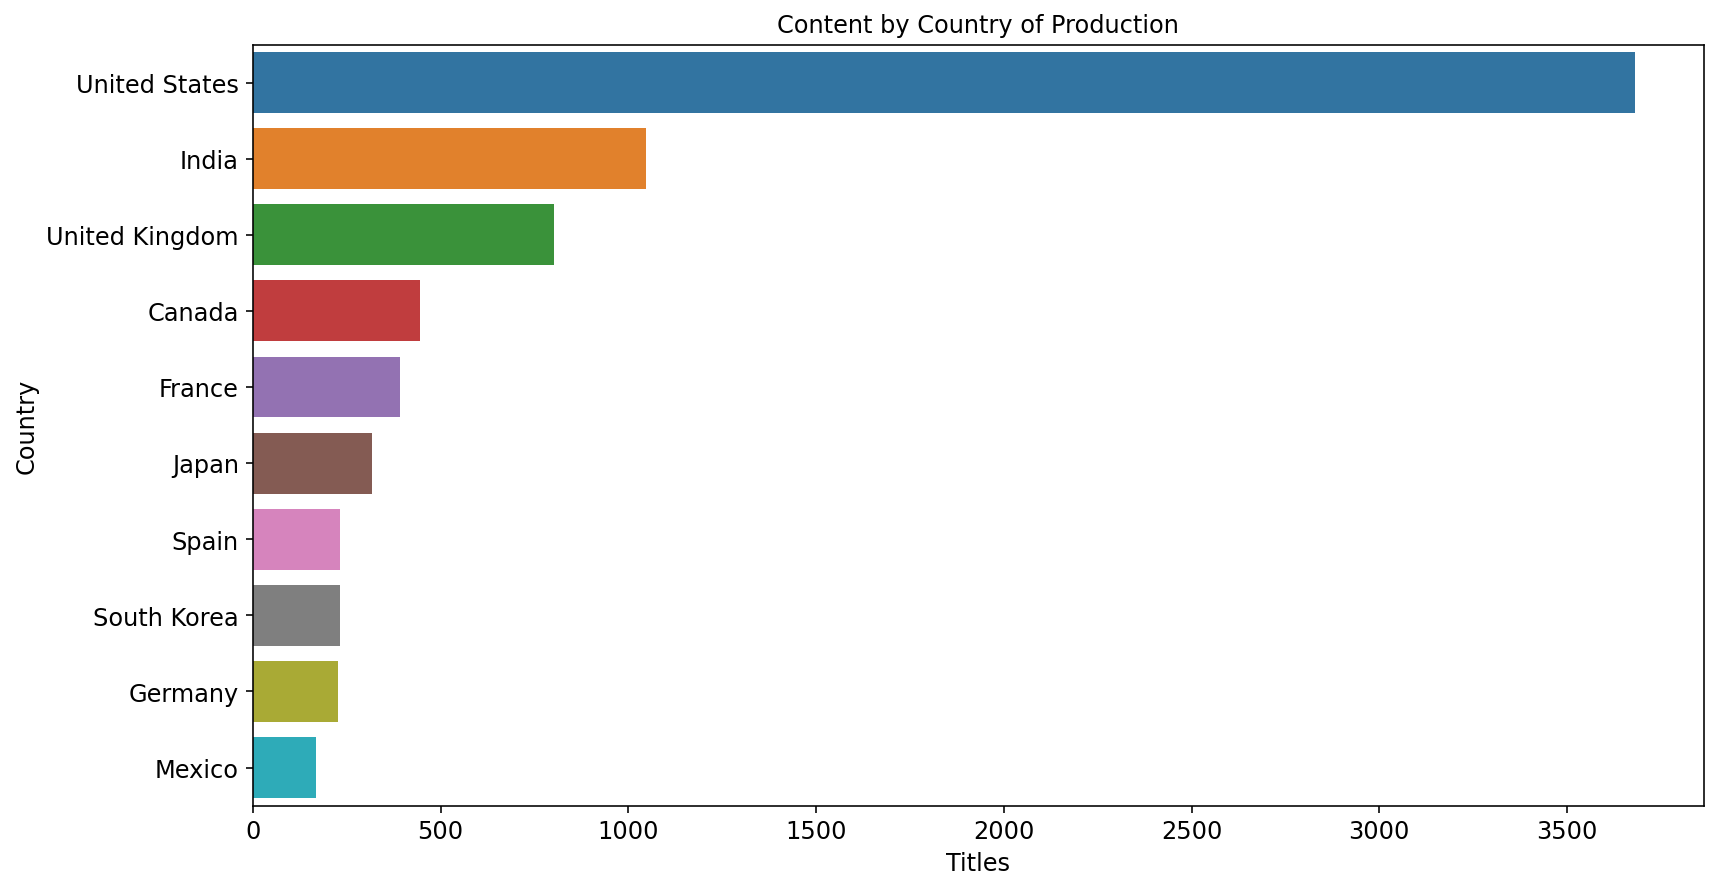

In [53]:
filtered_countries = data.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:10])
plt.title('Content by Country of Production')
plt.xlabel('Titles')
plt.ylabel('Country')

plt.savefig("Content_by_country.png", bbox_inches='tight',dpi=300)
plt.show()

The bar chart above demonstrated top 10 countries that produce Netflix movies and TV shows.  Among these, United States is the largest producer of the Netflix content.